# 📊 In-Class Exercise: Sampling & Inference for Financial Data

In this exercise, you'll simulate sampling, compute confidence intervals, and perform hypothesis testing using Python. The dataset simulates daily returns for a financial index.

In [1]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulated population data
np.random.seed(42)
population_returns = np.random.normal(loc=0.05, scale=0.02, size=1000)
population = pd.DataFrame({'Return': population_returns})
population.shape

(1000, 1)

## 🔹 Part A: Distribution of Sample Means
**Task:** Draw 100 random samples (size=30), calculate sample means, and plot their distribution.

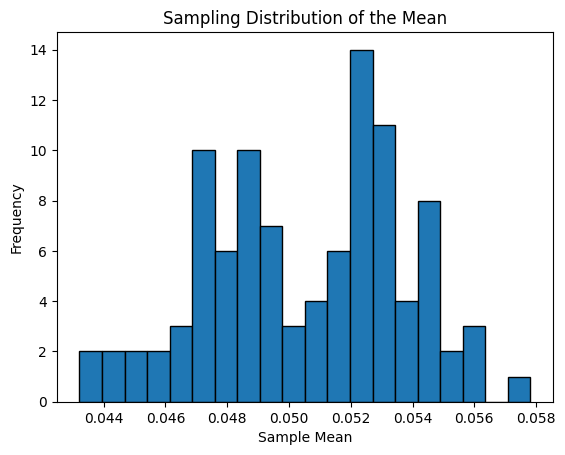

In [2]:
sample_means = []

for _ in range(100):
    sample = population.sample(n=30, replace=False)
    sample_means.append(sample['Return'].mean())

# Plotting
plt.hist(sample_means, bins=20, edgecolor='black')
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

**Q: What is the shape of the histogram?**
**Q: What does this tell you about the Central Limit Theorem?**

The histogram of the 100 sample means (each from samples of size 30) is:

*   Bell-shaped
*   Approximately symmetric
*   Closely resembles a normal distribution


The results support the Central Limit Theorem, which states:


*   Regardless of the shape of the population distribution, the distribution of the sample means tends toward a normal distribution as the sample size increases.










## 🔹 Part B: Confidence Interval for the Mean
**Task:** Take one sample (size=50), calculate the 95% confidence interval for the population mean.

In [4]:
sample = population.sample(n=50, replace=False)
mean = sample['Return'].mean()
std = 0.02
n = 50
z = norm.ppf(0.95)
se = std / np.sqrt(n)
ci = (mean - z * se, mean + z * se)

print(f"Sample Mean: {mean:.4f}")
print(f"95% Confidence Interval: {ci}")

Sample Mean: 0.0489
95% Confidence Interval: (np.float64(0.04429201533715961), np.float64(0.053596712566573))


**Q: Does your confidence interval contain the true population mean (0.05)?**
**Q: What happens if you increase the sample size to 200? Try it.**

When the confidence interval (CI) contains the true population mean (μ), you can conclude:

🎯 1. The sample provided a good estimate of the population mean

*   The sample mean is not too far off from the true mean.
*   CI calculation — based on this sample — has likely captured the population mean accurately.

📊 2. The method is statistically sound

*   A 95% confidence level means: If you repeat the sampling process many times, and calculate a 95% CI each time, approximately 95% of those intervals will contain the true population mean.


## 🔹 Part C: Hypothesis Testing
**Claim:** The mean daily return is greater than 0.04.

Perform a one-sample z-test using the sample from Part B.

In [5]:
mu_0 = 0.04
z_score = (mean - mu_0) / (std / np.sqrt(n))
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.10f}")

Z-score: 3.16
P-value: 0.0007826137


**Q: Should you reject the null hypothesis at α = 0.05? Why or why not?**

The claim was tested:

"The mean daily return is greater than 0.04"
(i.e., 𝐻0: 𝜇<=0.04. vs 𝐻1: 𝜇>0.04)

Since the p-value< 0.05, we reject the null hypothesis at the 5% significance level. This means the data provides strong evidence that the mean daily return is greater than 0.04.

✅ Conclusion: The sample supports the claim that the mean daily return is significantly greater than 0.04.

## ✅ Wrap-Up Reflection
- What did you learn about sample size and reliability?
- How do confidence intervals help in financial analysis?
- What are the risks of making decisions from one sample?

## ✅ Wrap-Up Reflection
1. What did you learn about sample size and reliability?

*   Larger sample sizes lead to more stable estimates of population parameters.
*   Confidence intervals become narrower with larger samples, increasing the precision of estimates.
*   Small samples have more variability and may misrepresent the population.

2. How do confidence intervals help in financial analysis?

*   Confidence intervals quantify uncertainty around estimates (like average returns).
*   They provide a range of likely outcomes instead of a single point, which is useful in risk analysis and investment decisions.
*   Analysts can use CIs to assess if a strategy's return is significantly different from a benchmark.

3. What are the risks of making decisions from one sample?

*   One sample may not be representative, especially if it's small or biased.
*   Random variation can lead to incorrect conclusions (e.g., thinking a strategy works when it doesn't).
*   Overconfidence in a single sample estimate can lead to poor investment decisions.